In [173]:
import numpy as np
import pandas as pd

WD= pd.read_csv("012330-99999-2017.csv")


print(WD.shape)
list(WD)

(8635, 26)


['Total_Record_length',
 'Weather_Station_USAF ',
 'Year',
 'Month',
 'Day',
 'Date',
 'time.H',
 'Obs Type',
 'Latitude',
 'Longitude',
 'SYNOP Type',
 'Elevation(m)',
 'Call Letter Identifier',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)']

In [186]:
colsToDrop = ['Year','Month','Day','Weather_Station_USAF ', 'SYNOP Type','Obs Type',
              'Call Letter Identifier','Weather_Station_USAF ', 'Latitude','Longitude', 'Elevation(m)']
x_train= WD.drop(colsToDrop, axis=1)

y_train = WD['Air Temp (Cel)']

list(x_train)
list(y_train.shape)

[8635]

In [187]:
x_train_lag = pd.concat([x_train.shift(24), x_train.shift(48), x_train.shift(72), x_train.shift(94),  x_train.shift(116),  x_train.shift(140),  x_train.shift(164)], axis=1)
list(x_train_lag)


['Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)',
 'Air Temp (Cel)',
 'Air Temp (QC)',
 'Dew Point (Cel)',
 'Dew Point (QC)',
 'Precip Time (H)',
 'Precip Depth (mm)',
 'Precip (CC)',
 'Precip (QC)',
 'Total_Record_length',
 'Date',
 'time.H',
 'Wind (Angular Degrees)',
 'Wind (QC)',
 'Wind TC',
 'Wind Speed (m/s)',
 'Wind Speed (QC)'

In [188]:
x_train_lag.columns = ["Total_Record_length_lag_1","Date_lag_1","time.H_lag_1","Wind (Angular Degrees)_lag_1",
                       "Wind (QC)_lag_1","Wind TC_lag_1","Wind Speed (m/s)_lag_1","Wind Speed (QC)_lag_1","Air Temp (Cel)_lag_1",
                       "Air Temp (QC)_lag_1","Dew Point (Cel)_lag_1","Dew Point (QC)_lag_1","Precip Time (H)_lag_1",
                       "Precip Depth (mm)_lag_1","Precip (CC)_lag_1","Precip (QC)_lag_1","Total_Record_length_lag_2",
                       "Date_lag_2","time.H_lag_2","Wind (Angular Degrees)_lag_2","Wind (QC)_lag_2","Wind TC_lag_2",
                       "Wind Speed (m/s)_lag_2","Wind Speed (QC)_lag_2","Air Temp (Cel)_lag_2","Air Temp (QC)_lag_2","Dew Point (Cel)_lag_2",
                       "Dew Point (QC)_lag_2","Precip Time (H)_lag_2","Precip Depth (mm)_lag_2","Precip (CC)_lag_2",
                       "Precip (QC)_lag_2","Total_Record_length_lag_3","Date_lag_3","time.H_lag_3",
                       "Wind (Angular Degrees)_lag_3","Wind (QC)_lag_3","Wind TC_lag_3","Wind Speed (m/s)_lag_3",
                       "Wind Speed (QC)_lag_3","Air Temp (Cel)_lag_3","Air Temp (QC)_lag_3","Dew Point (Cel)_lag_3","Dew Point (QC)_lag_3",
                       "Precip Time (H)_lag_3","Precip Depth (mm)_lag_3","Precip (CC)_lag_3","Precip (QC)_lag_3",
                       "Total_Record_length_lag_4","Date_lag_4","time.H_lag_4","Wind (Angular Degrees)_lag_4",
                       "Wind (QC)_lag_4","Wind TC_lag_4","Wind Speed (m/s)_lag_4","Wind Speed (QC)_lag_4","Air Temp (Cel)_lag_4","Air Temp (QC)_lag_4",
                       "Dew Point (Cel)_lag_4","Dew Point (QC)_lag_4","Precip Time (H)_lag_4","Precip Depth (mm)_lag_4",
                       "Precip (CC)_lag_4","Precip (QC)_lag_4","Total_Record_length_lag_5","Date_lag_5","time.H_lag_5",
                       "Wind (Angular Degrees)_lag_5","Wind (QC)_lag_5","Wind TC_lag_5","Wind Speed (m/s)_lag_5",
                       "Wind Speed (QC)_lag_5","Air Temp (Cel)_lag_5","Air Temp (QC)_lag_5","Dew Point (Cel)_lag_5","Dew Point (QC)_lag_5",
                       "Precip Time (H)_lag_5","Precip Depth (mm)_lag_5","Precip (CC)_lag_5","Precip (QC)_lag_5",
                       "Total_Record_length_lag_6","Date_lag_6","time.H_lag_6","Wind (Angular Degrees)_lag_6",
                       "Wind (QC)_lag_6","Wind TC_lag_6","Wind Speed (m/s)_lag_6","Wind Speed (QC)_lag_6","Air Temp (Cel)_lag_6",
                       "Air Temp (QC)_lag_6","Dew Point (Cel)_lag_6","Dew Point (QC)_lag_6","Precip Time (H)_lag_6",
                       "Precip Depth (mm)_lag_6","Precip (CC)_lag_6","Precip (QC)_lag_6","Total_Record_length_lag_7",
                       "Date_lag_7","time.H_lag_7","Wind (Angular Degrees)_lag_7","Wind (QC)_lag_7","Wind TC_lag_7",
                       "Wind Speed (m/s)_lag_7","Wind Speed (QC)_lag_7","Air Temp (Cel)_lag_7","Air Temp (QC)_lag_7","Dew Point (Cel)_lag_7",
                       "Dew Point (QC)_lag_7","Precip Time (H)_lag_7","Precip Depth (mm)_lag_7","Precip (CC)_lag_7",
                       "Precip (QC)_lag_7"]

train_x_lag = pd.concat([x_train_lag, y_train], axis = 1)
print(train_x_lag)

      Total_Record_length_lag_1  Date_lag_1  time.H_lag_1  \
0                           NaN         NaN           NaN   
1                           NaN         NaN           NaN   
2                           NaN         NaN           NaN   
3                           NaN         NaN           NaN   
4                           NaN         NaN           NaN   
5                           NaN         NaN           NaN   
6                           NaN         NaN           NaN   
7                           NaN         NaN           NaN   
8                           NaN         NaN           NaN   
9                           NaN         NaN           NaN   
10                          NaN         NaN           NaN   
11                          NaN         NaN           NaN   
12                          NaN         NaN           NaN   
13                          NaN         NaN           NaN   
14                          NaN         NaN           NaN   
15                      

[8635 rows x 113 columns]


In [189]:
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

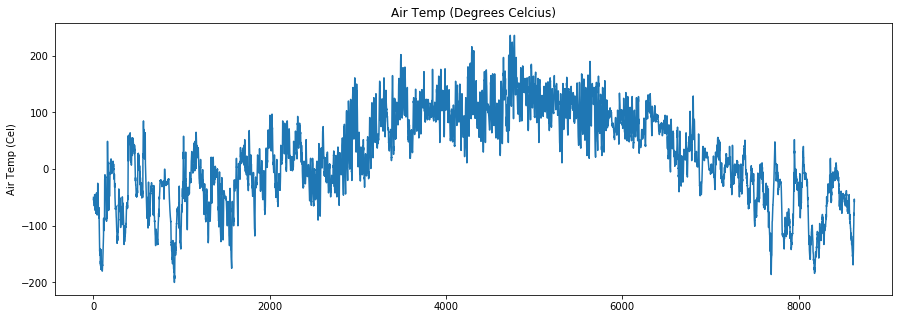

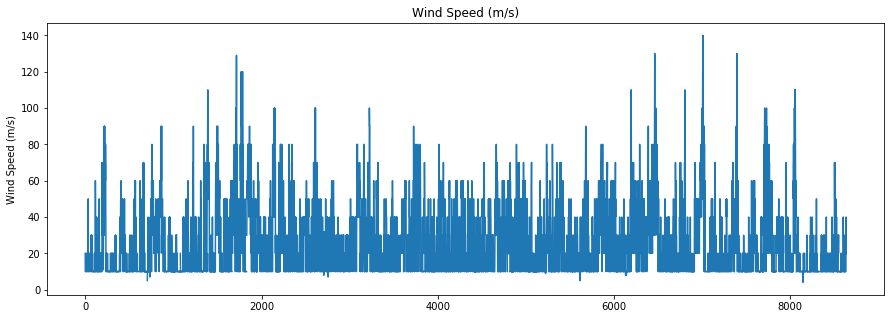

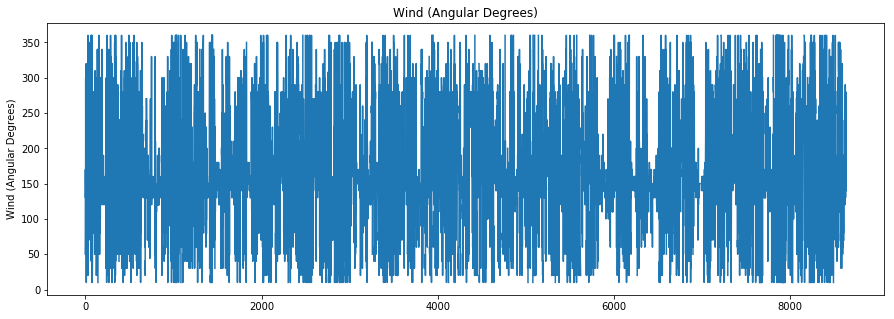

In [190]:
index = WD.index
plt.figure(figsize=(15,5))
plt.plot(index,WD['Air Temp (Cel)'])
plt.ylabel('Air Temp (Cel)')
plt.title('Air Temp (Degrees Celcius)');

plt.figure(figsize=(15,5))
plt.plot(index,WD['Wind Speed (m/s)'])
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed (m/s)');

plt.figure(figsize=(15,5))
plt.plot(index,WD['Wind (Angular Degrees)'])
plt.ylabel('Wind (Angular Degrees)')
plt.title('Wind (Angular Degrees)');

In [113]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2OConnectionError: Version mismatch. H2O is version 3.16.0.1, but the h2o-python package is version UNKNOWN. Install the matching h2o-Python version from - http://h2o-release.s3.amazonaws.com/h2o/rel-wheeler/1/index.html.

In [128]:
train_x = h2o.H2OFrame(train_x_lag)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [129]:
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator

In [131]:
y = 'Air Temp (Cel)'
x = list(train_x.columns)
x.remove(y)

dl_1 = H2ODeepLearningEstimator(epochs=1)
dl_1.train(x, y, train_x)

dl_250 = H2ODeepLearningEstimator(checkpoint=dl_1, epochs=250)
dl_250.train(x, y, train_x)

dl_500 = H2ODeepLearningEstimator(checkpoint=dl_250, epochs=500)
dl_500.train(x, y, train_x)

dl_750 = H2ODeepLearningEstimator(checkpoint=dl_500, epochs=750)
dl_750.train(x, y, train_x)

dl_model = H2ODeepLearningEstimator(epochs=1000)
dl_model.train(x, y, train_x)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1517719733345_13


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 1188.1025600124929
RMSE: 34.46886363100027
MAE: 25.260410096178948
RMSLE: NaN
Mean Residual Deviance: 1188.1025600124929
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2018-02-04 11:24:05,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2018-02-04 11:24:08,6.014 sec,308 obs/sec,0.0994789,1,859.0,53.1282105,2822.6067505,42.3026658
,2018-02-04 11:24:24,22.866 sec,527 obs/sec,1.0232774,10,8836.0,34.4688636,1188.1025600,25.2604101


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Air Temp (Cel)_lag_1,1.0,1.0,0.0030779
Dew Point (Cel)_lag_1,0.6319033,0.6319033,0.0019449
Precip (QC)_lag_6.nan,0.5458966,0.5458966,0.0016802
SYNOP Type_lag_2.FM-12,0.5441802,0.5441802,0.0016749
SYNOP Type_lag_4.FM-12,0.5425916,0.5425916,0.0016700
---,---,---,---
Obs Type_lag_3.missing(NA),0.0,0.0,0.0
Obs Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_3.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1517719733345_14


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 18.35594905146729
RMSE: 4.284384325835778
MAE: 3.344735124494888
RMSLE: NaN
Mean Residual Deviance: 18.35594905146729
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2018-02-04 11:24:29,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2018-02-04 11:24:39,13.768 sec,499 obs/sec,0.6013897,1,5193.0,54.3514150,2954.0763087,43.1141077
,2018-02-04 11:25:12,46.786 sec,903 obs/sec,4.2337001,7,36558.0,47.0629357,2214.9199175,38.3525560
,2018-02-04 11:25:45,1 min 19.731 sec,1116 obs/sec,9.0744644,15,78358.0,28.8521306,832.4454419,22.0627472
,2018-02-04 11:26:19,1 min 53.855 sec,1246 obs/sec,14.5101332,24,125295.0,23.0439393,531.0231369,17.5381577
---,---,---,---,---,---,---,---,---,---
,2018-02-04 11:43:31,19 min 5.888 sec,1885 obs/sec,225.8213086,373,1949967.0,4.5768645,20.9476889,3.5506449
,2018-02-04 11:44:03,19 min 38.011 sec,1888 obs/sec,232.5015634,384,2007651.0,4.3222632,18.6819593,3.3489898
,2018-02-04 11:44:38,20 min 12.259 sec,1891 obs/sec,239.7697742,396,2070412.0,5.2415675,27.4740300,4.1778433
,2018-02-04 11:45:09,20 min 43.737 sec,1894 obs/sec,246.4449334,407,2128052.0,5.3579796,28.7079453,4.2946778



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Air Temp (Cel)_lag_1,1.0,1.0,0.0081170
Dew Point (Cel)_lag_6,0.8188263,0.8188263,0.0066464
Dew Point (Cel)_lag_1,0.7991418,0.7991418,0.0064866
Air Temp (Cel)_lag_3,0.7726194,0.7726194,0.0062713
Dew Point (Cel)_lag_4,0.7711671,0.7711671,0.0062596
---,---,---,---
Obs Type_lag_3.missing(NA),0.0,0.0,0.0
Obs Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_3.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()
deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1517719733345_15


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 8.796628991325104
RMSE: 2.965911157018211
MAE: 2.2887556828703275
RMSLE: NaN
Mean Residual Deviance: 8.796628991325104
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2018-02-04 11:45:32,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2018-02-04 11:45:39,9.942 sec,454 obs/sec,0.3513607,1,3034.0,57.7791052,3338.4250006,45.8130581
,2018-02-04 11:46:09,39.687 sec,887 obs/sec,3.4240880,10,29567.0,35.7900049,1280.9244478,27.0198311
,2018-02-04 11:46:41,1 min 11.834 sec,1081 obs/sec,7.8339317,23,67646.0,28.0196221,785.0992224,21.7072954
,2018-02-04 11:47:11,1 min 42.017 sec,1209 obs/sec,12.5716271,37,108556.0,22.8503908,522.1403594,17.8754784
---,---,---,---,---,---,---,---,---,---
,2018-02-04 12:23:00,37 min 30.823 sec,1864 obs/sec,438.0098437,1291,3782215.0,3.0916022,9.5580039,2.3811394
,2018-02-04 12:23:32,38 min 2.993 sec,1865 obs/sec,444.5037638,1310,3838290.0,3.3130669,10.9764124,2.5642864
,2018-02-04 12:24:05,38 min 36.000 sec,1866 obs/sec,451.2964679,1330,3896945.0,3.2273166,10.4155726,2.4956963
,2018-02-04 12:24:36,39 min 6.875 sec,1866 obs/sec,457.3807759,1348,3949483.0,4.0175230,16.1404907,3.2111426



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Air Temp (Cel)_lag_1,1.0,1.0,0.0093852
Dew Point (Cel)_lag_7,0.7949679,0.7949679,0.0074609
Dew Point (Cel)_lag_1,0.7892639,0.7892639,0.0074074
Dew Point (Cel)_lag_4,0.7168659,0.7168659,0.0067279
Dew Point (Cel)_lag_6,0.7058139,0.7058139,0.0066242
---,---,---,---
Obs Type_lag_3.missing(NA),0.0,0.0,0.0
Obs Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_4.missing(NA),0.0,0.0,0.0
SYNOP Type_lag_3.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()
deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [166]:

VI_500 = dl_500._model_json['output']['variable_importances'].as_data_frame()
VI_500 = VI_500.iloc[0:27,]

print(VI_500)


                        variable  relative_importance  scaled_importance  \
0           Air Temp (Cel)_lag_1             1.000000           1.000000   
1          Dew Point (Cel)_lag_7             0.794968           0.794968   
2          Dew Point (Cel)_lag_1             0.789264           0.789264   
3          Dew Point (Cel)_lag_4             0.716866           0.716866   
4          Dew Point (Cel)_lag_6             0.705814           0.705814   
5         Wind Speed (m/s)_lag_3             0.696280           0.696280   
6          Dew Point (Cel)_lag_2             0.694622           0.694622   
7         Wind Speed (m/s)_lag_4             0.683622           0.683622   
8           Air Temp (Cel)_lag_4             0.676121           0.676121   
9           Air Temp (Cel)_lag_3             0.661169           0.661169   
10         Dew Point (Cel)_lag_3             0.656994           0.656994   
11        Wind Speed (m/s)_lag_1             0.648717           0.648717   
12         D

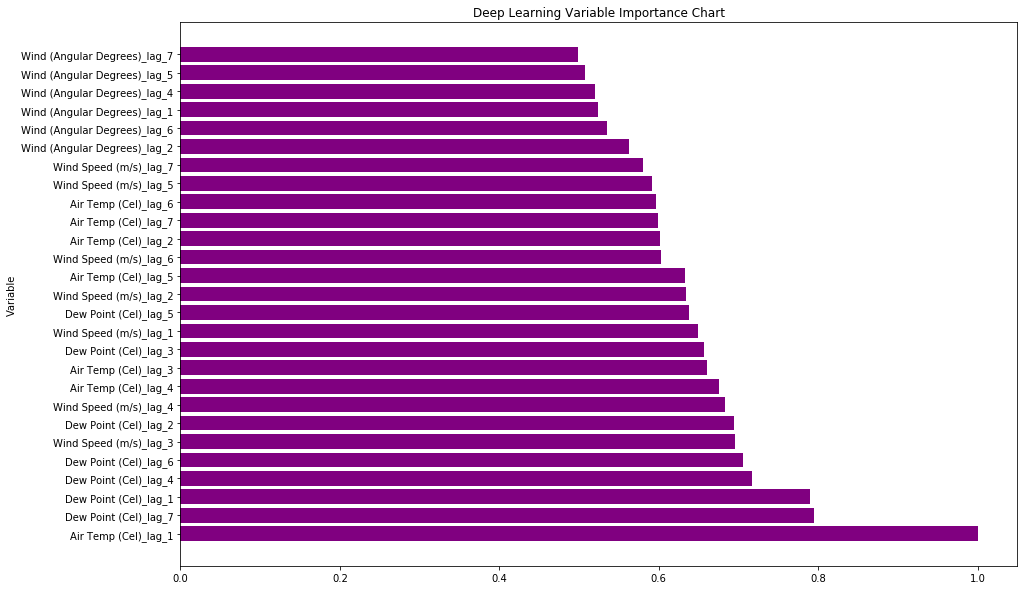

In [169]:
plt.figure(figsize=(15,10))
x = VI_500['variable']
relative_importance = VI_500['relative_importance']

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, relative_importance, color='purple')
plt.ylabel("Variable")
plt.title("Deep Learning Variable Importance Chart")

plt.yticks(x_pos, x)

plt.show()



In [140]:
models_act = []
m_names_act = []
for i,method in enumerate(["Tanh","Maxout","Rectifier","RectifierWithDropout"]):
    models_act.append(H2ODeepLearningEstimator(activation=method, hidden=[100,100], epochs=500))
    models_act[i].train(x, y, train_x)
    m_names_act.append("DL "+ method + " Activation")

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning Model Build progress: |███████ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_83af5c3e93acbf8f14c25bbe304b4eb6> was cancelled by the user.